<a href="https://colab.research.google.com/github/IagoGarciaSuarez/MachineLearningTechniques/blob/main/ML_Task_3_Hyperparameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Getting Ready

In [1]:
!rm *.csv
!wget https://raw.githubusercontent.com/IagoGarciaSuarez/MachineLearningTechniques/main/ins_10best_results.csv

--2022-01-22 16:52:54--  https://raw.githubusercontent.com/IagoGarciaSuarez/MachineLearningTechniques/main/ins_10best_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2857144 (2.7M) [text/plain]
Saving to: ‘ins_10best_results.csv’

ins_10best_results. 100%[===================>]   2.72M  --.-KB/s    in 0.05s   

2022-01-22 16:52:54 (57.9 MB/s) - ‘ins_10best_results.csv’ saved [2857144/2857144]



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import randint as sp_randint
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split


In [3]:
insurance_df = pd.read_csv("ins_10best_results.csv")
ins_kbest = insurance_df.drop(['Unnamed: 0', 'UltimateIncurredClaimCost'], axis=1)

# 2. Hyperparameter Optimization with Grid Search

In [4]:
rng = np.random.RandomState(1)
X_train, X_test, y_train, y_test = train_test_split(ins_kbest, insurance_df['UltimateIncurredClaimCost'], test_size=0.33, random_state=rng)
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [5]:
def report(results, n_top=3): 
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [6]:
regressor = RandomForestRegressor() 

In [7]:
param_dist = {"n_estimators": [50, 100, 300], # Number of trees in random forest
              "max_depth": [50, 100, 150], # Maximum number of levels in tree
              "min_samples_split": [2, 4, 6], #  Minimum number of samples required to split a node
              "min_samples_leaf": [8, 12, 16], # Minimum number of samples required at each leaf node
              "bootstrap": [True, False] # Method of selecting samples for training each tree
            }

In [8]:
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv = 5)

grid_regres.fit(X = X_train, y = y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [50, 100, 150],
                         'min_samples_leaf': [8, 12, 16],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 300]})

Looking at the results, the number of estimators is the same for the top 3 models, with a value of 100. In the other hand, the max depth for the best is 50 while for the others is 150

In [9]:
report(grid_regres.cv_results_)

Model with rank: 1
Mean validation score: 0.280 (std: 0.102)
Parameters: {'bootstrap': True, 'max_depth': 50, 'min_samples_leaf': 16, 'min_samples_split': 6, 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.279 (std: 0.101)
Parameters: {'bootstrap': True, 'max_depth': 150, 'min_samples_leaf': 16, 'min_samples_split': 4, 'n_estimators': 100}

Model with rank: 3
Mean validation score: 0.279 (std: 0.101)
Parameters: {'bootstrap': True, 'max_depth': 150, 'min_samples_leaf': 16, 'min_samples_split': 2, 'n_estimators': 100}



In [10]:
grid_regres.best_estimator_

RandomForestRegressor(max_depth=50, min_samples_leaf=16, min_samples_split=6)

In [11]:
best_grid = grid_regres.best_estimator_

best_grid.fit( X = X_train, y = y_train)
y_pred = best_grid.predict(X = X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE = ', mae)
print('R^2 = ', r2)

MAE =  7670.5164655953
R^2 =  0.24116825948993592


The error is still very high, so it may not be reliable enough.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


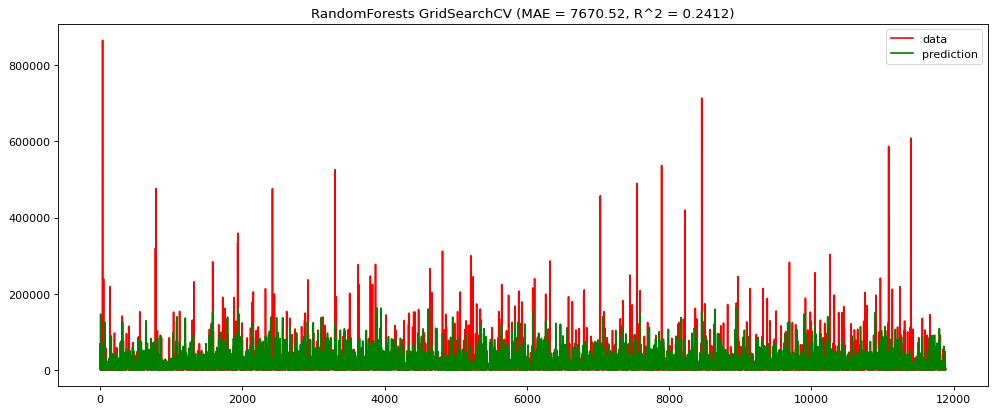

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


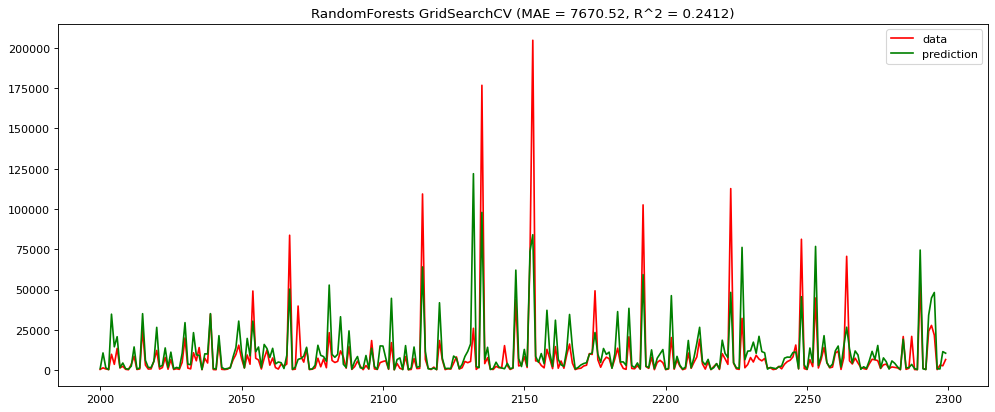

In [14]:
figure(figsize=(15, 6), dpi=80)

xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f, R^2 = %1.4f)" % (mae, r2))

plt.show()

figure(figsize=(15, 6), dpi=80)

xx = np.stack(i for i in range(2000,2300))
plt.plot(xx, y_test[2000:2300], c='r', label='data')
plt.plot(xx, y_pred[2000:2300], c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f, R^2 = %1.4f)" % (mae, r2))

plt.show()

The highest influence comes from the initial incurred claim cost, while the weekly wages and the age follow from behind. 

In [15]:
print ('Feature Relevancies')
pd.DataFrame({'Attributes': list(range(0, 7)) + ['InitialIncurredClaimsCost', 'WeeklyWages', 'Age'] ,
              'Decision Tree': best_grid.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,0,0.029707
1,1,0.000000
2,2,0.000332
3,3,0.019480
4,4,0.000000
5,5,0.023113
6,6,0.001515
7,InitialIncurredClaimsCost,0.789210
8,WeeklyWages,0.069264
9,Age,0.067379
